# Etapa 2 - Conociendo los datos
## Histórico de Precios: Productos Terminados
### Angle (Perfiles Comerciales)
El conjunto de datos corresponde a los precios de una barra angular de acero de 2 x 2 pulgadas con un grosor de 1/4 de pulgada, conocida como "Angle 2x0.25 FOB Mill".

#### Variables
- $Date$: Fecha en que se registró el precio del producto. Es categórica y sus valores posibles están en formato "d/m/aaaa", desde el primer registro hasta el presente.
- $Low$: Precio más bajo registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por quintal (cwt), desde 0 hasta el máximo registrado.
- $Mid$: Precio medio registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por quintal (cwt), desde 0 hasta el máximo registrado.
- $High$: Precio más alto registrado para el producto en la fecha especificada. Es numérica y sus valores posibles están en dólares estadounidenses por quintal (cwt), desde 0 hasta el máximo registrado.
- $Mid$ $Change$ $\%$: Cambio porcentual en el precio medio en comparación con el período anterior (nuevo-anterior)/anterior. Es numérica y sus valores posibles están enre -1 (-100%) y el máximo cambio positivo registrado.

#### Librerías

In [3]:
import pandas as pd # Análisis de datos.
import matplotlib.pyplot as plt # Gráficos.
import seaborn as sns # Formato de los gráficos.

#### Comprensión de los datos

In [4]:
# Leer el archivo Excel:
anglePerfilesComerciales_df = pd.read_excel('Angle (Perfiles Comerciales).xlsx',
  skiprows=9, nrows=221-9, engine='openpyxl')

# Mostrar las primeras filas del DataFrame:
anglePerfilesComerciales_df

,Date,Low,Mid,High,Mid Change %
0,28/2/2025,51.3,51.3,51.3,0.062112
1,31/1/2025,48.3,48.3,48.3,0.000000
2,27/12/2024,48.3,48.3,48.3,0.000000
3,3/12/2024,48.3,48.3,48.3,0.000000
4,25/10/2024,48.3,48.3,48.3,-0.110497
...,...,...,...,...,...
206,16/8/1996,16.5,16.5,16.5,-0.073034
207,1/1/1995,17.8,17.8,17.8,0.059524
208,3/7/1994,16.8,16.8,16.8,0.030675
209,3/1/1994,16.3,16.3,16.3,0.031646


Son 211 filas y 5 columnas.

Se agruparán los datos anteriores por mes, y se quitará la columna de 'Mid Change %', pues no es de interés para los objetivos de nuestro proyecto. De las demás columnas se obtendrá un promedio mensual.

In [5]:
# Convertir la columna 'Date' a tipo datetime, considerando el formato d/m/aaaa:
anglePerfilesComerciales_df['Date'] = pd.to_datetime(anglePerfilesComerciales_df['Date'], dayfirst=True)

# Establecer 'Date' como índice:
anglePerfilesComerciales_df.set_index('Date', inplace=True)

# Re-muestrear los datos a nivel mensual y obtener el promedio de las columnas 'Low', 'Mid' y 'High':
anglePerfilesComerciales_df = anglePerfilesComerciales_df.resample('M')[['Low', 'Mid', 'High']].mean()

# Opcional: Reiniciar el índice para tener 'Date' como columna nuevamente:
anglePerfilesComerciales_df = anglePerfilesComerciales_df.reset_index()

# Formatear la columna 'Date' para mostrar 'NombreMes Año':
anglePerfilesComerciales_df['Date'] = anglePerfilesComerciales_df['Date'].dt.strftime('%B %Y')

# Mostrar el DataFrame resultante:
anglePerfilesComerciales_df

<ipython-input-5-5f19e6f37d51>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  anglePerfilesComerciales_df = anglePerfilesComerciales_df.resample('M')[['Low', 'Mid', 'High']].mean()


,Date,Low,Mid,High
0,November 1993,15.8,15.8,15.8
1,December 1993,NaN,NaN,NaN
2,January 1994,16.3,16.3,16.3
3,February 1994,NaN,NaN,NaN
4,March 1994,NaN,NaN,NaN
...,...,...,...,...
371,October 2024,48.3,48.3,48.3
372,November 2024,NaN,NaN,NaN
373,December 2024,48.3,48.3,48.3
374,January 2025,48.3,48.3,48.3


Ahora son 376 filas y 4 columnas.

#### Calidad de los datos

In [6]:
# Contar datos nulos de cada columna:
valores_nulos_por_columna = anglePerfilesComerciales_df.isnull().sum()
valores_nulos_por_columna.name = 'Valores Nulos'
valores_nulos_por_columna

,Valores Nulos
Date,0
Low,182
Mid,182
High,182


Los valores nulos se dan porque hay meses en el dataframe original en los que no hay cambio de precio, se hará una interpolación del último dato no nulo anterior y el primer dato no nulo posterior.

In [7]:
# Aplicar la interpolación lineal a las columnas 'Low', 'Mid' y 'High':
anglePerfilesComerciales_df[['Low', 'Mid', 'High']] = anglePerfilesComerciales_df[['Low', 'Mid', 'High']].interpolate(method='linear', limit_direction='both')

In [8]:
valores_nulos_por_columna = anglePerfilesComerciales_df.isnull().sum()
valores_nulos_por_columna.name = 'Valores Nulos'
valores_nulos_por_columna

,Valores Nulos
Date,0
Low,0
Mid,0
High,0


Ya no hay datos nulos.

In [9]:
# Contar registros duplicados:
num_duplicados = anglePerfilesComerciales_df.duplicated().sum()
print(f"Número de registros duplicados: {num_duplicados}")

# Visualizar los registros duplicados (si existen):
if num_duplicados > 0:
    duplicados = anglePerfilesComerciales_df[anglePerfilesComerciales_df.duplicated()]
    print("Registros duplicados:")
    print(duplicados)

Número de registros duplicados: 0


In [10]:
# Detectar registros con valores fuera del rango esperado:
erroneos = anglePerfilesComerciales_df[(anglePerfilesComerciales_df['Low'] < 0) | (anglePerfilesComerciales_df['Mid'] < 0) | (anglePerfilesComerciales_df['High'] < 0)]
print("Registros con valores erróneos en 'Low':")
print(erroneos)

Registros con valores erróneos en 'Low':
Empty DataFrame
Columns: [Date, Low, Mid, High]
Index: []


Los precios están dentro del rango correcto.

In [11]:
anglePerfilesComerciales_df.dtypes # Tipos de dato.

,0
Date,object
Low,float64
Mid,float64
High,float64


Todos los datos tienen el tipo correcto.

#### Medidas estadísticas

In [12]:
# Lista de columnas cuantitativas:
numeric_columns = ['Low', 'Mid', 'High']

for col in numeric_columns:
    print(f"Variable: {col}")
    # Medidas de tendencia central:
    media = anglePerfilesComerciales_df[col].mean()
    mediana = anglePerfilesComerciales_df[col].median()
    # La moda puede devolver más de un valor, por eso se imprime como Series:
    moda = anglePerfilesComerciales_df[col].mode()

    # Medidas de dispersión:
    rango = anglePerfilesComerciales_df[col].max() - anglePerfilesComerciales_df[col].min()
    varianza = anglePerfilesComerciales_df[col].var()
    desv_estandar = anglePerfilesComerciales_df[col].std()

    print(f"  Promedio/Media: {media}")
    print(f"  Mediana: {mediana}")
    print(f"  Moda: {list(moda)}") # Serie a lista para mayor claridad.
    print(f"  Rango (max - min): {rango}")
    print(f"  Varianza: {varianza}")
    print(f"  Desviación Estándar: {desv_estandar}\n")

Variable: Low
  Promedio/Media: 31.617054521276593
  Mediana: 32.8
  Moda: [40.65]
  Rango (max - min): 53.0
  Varianza: 199.62435093555416
  Desviación Estándar: 14.128848181488616

Variable: Mid
  Promedio/Media: 31.617054521276593
  Mediana: 32.8
  Moda: [40.65]
  Rango (max - min): 53.0
  Varianza: 199.62435093555416
  Desviación Estándar: 14.128848181488616

Variable: High
  Promedio/Media: 31.617054521276593
  Mediana: 32.8
  Moda: [40.65]
  Rango (max - min): 53.0
  Varianza: 199.62435093555416
  Desviación Estándar: 14.128848181488616



Cada variable tiene sus medidas de tendencia central y dispersión iguales.

In [13]:
# Tabla de distribución de frecuencia para la variable 'Date':
frecuencia_date = anglePerfilesComerciales_df['Date'].value_counts().sort_index()
print("Tabla de distribución de frecuencia (Date):")
print(frecuencia_date)
print("\n")

# Ahora, calcular la mediana de la columna 'Date':
median_date = pd.to_datetime(anglePerfilesComerciales_df['Date'], dayfirst=True).median()

# Mostrar la mediana formateada:
print("Mediana de las fechas:", median_date.strftime("%B %Y"))

<ipython-input-13-57e167b9e8d2>:8: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  median_date = pd.to_datetime(anglePerfilesComerciales_df['Date'], dayfirst=True).median()


Tabla de distribución de frecuencia (Date):
Date
April 1994        1
April 1995        1
April 1996        1
April 1997        1
April 1998        1
                 ..
September 2020    1
September 2021    1
September 2022    1
September 2023    1
September 2024    1
Name: count, Length: 376, dtype: int64


Mediana de las fechas: June 2009


Cada fecha es única.

##### Exploración de datos

In [14]:
# Cuartiles, medidas de posición no-central (no solo la mediana) y detección de outliers:
print("Medidas de posición y dispersión (para variables numéricas):")
for col in ['Low', 'Mid', 'High']:
    Q1 = anglePerfilesComerciales_df[col].quantile(0.25)
    Q3 = anglePerfilesComerciales_df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = anglePerfilesComerciales_df[(anglePerfilesComerciales_df[col] < (Q1 - 1.5 * IQR)) | (anglePerfilesComerciales_df[col] > (Q3 + 1.5 * IQR))][col]

    print(f"\nVariable: {col}")
    print(f"  Cuartil 1 (Q1): {Q1}")
    print(f"  Cuartil 3 (Q3): {Q3}")
    print(f"  IQR: {IQR}")
    print(f"  Outliers detectados: {list(outliers)}")

Medidas de posición y dispersión (para variables numéricas):

Variable: Low
  Cuartil 1 (Q1): 17.059375
  Cuartil 3 (Q3): 39.949999999999996
  IQR: 22.890624999999996
  Outliers detectados: []

Variable: Mid
  Cuartil 1 (Q1): 17.059375
  Cuartil 3 (Q3): 39.949999999999996
  IQR: 22.890624999999996
  Outliers detectados: []

Variable: High
  Cuartil 1 (Q1): 17.059375
  Cuartil 3 (Q3): 39.949999999999996
  IQR: 22.890624999999996
  Outliers detectados: []


Cada variable tiene sus medidas de posición iguales.

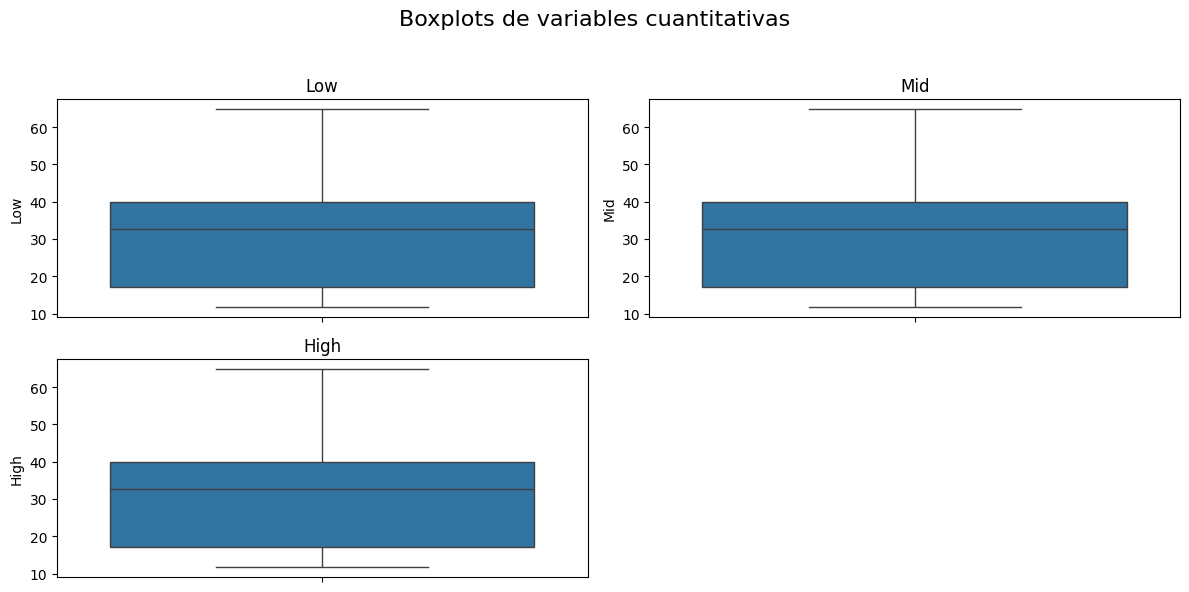

In [15]:
# Boxplots para visualizar la distribución y detectar outliers:
plt.figure(figsize=(12, 6))
plt.suptitle("Boxplots de variables cuantitativas", fontsize=16)
for i, col in enumerate(['Low', 'Mid', 'High'], 1):
    plt.subplot(2, 2, i)
    sns.boxplot(y=anglePerfilesComerciales_df[col])
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

Se observa en los boxplots que no hay datos atípicos y que el tercer cuartil está más cerca de la mediana que el primer cuartil.

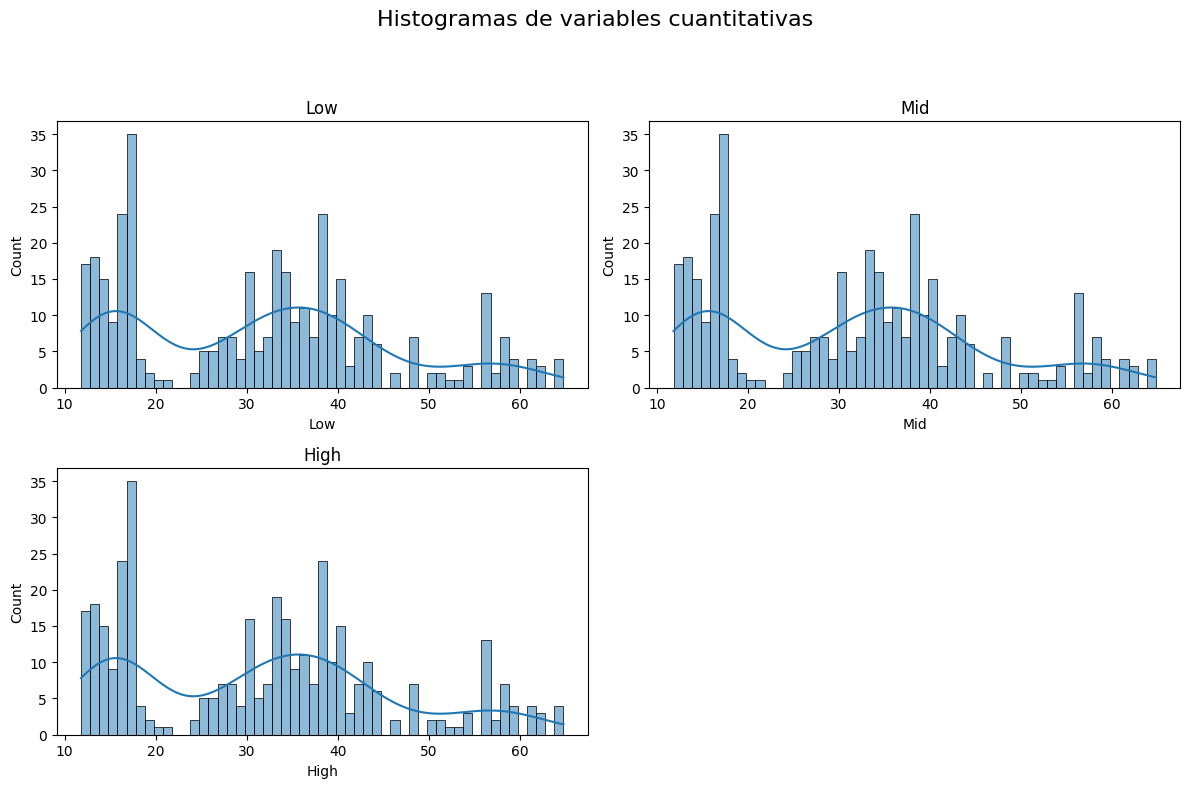

In [16]:
# Histogramas para analizar la distribución y ver la forma (simétrica/asimétrica):
plt.figure(figsize=(12, 8))
plt.suptitle("Histogramas de variables cuantitativas", fontsize=16)
for i, col in enumerate(['Low', 'Mid', 'High'], 1):
    plt.subplot(2, 2, i)
    sns.histplot(anglePerfilesComerciales_df[col], kde=True, bins=53)
    plt.title(col)
plt.tight_layout(rect=[0, 0, 1, 0.93])
plt.show()

Se observa un ligero sesgo a la izquierda en la distribución, pues los datos más altos se agrupan más cerca de la mediana.

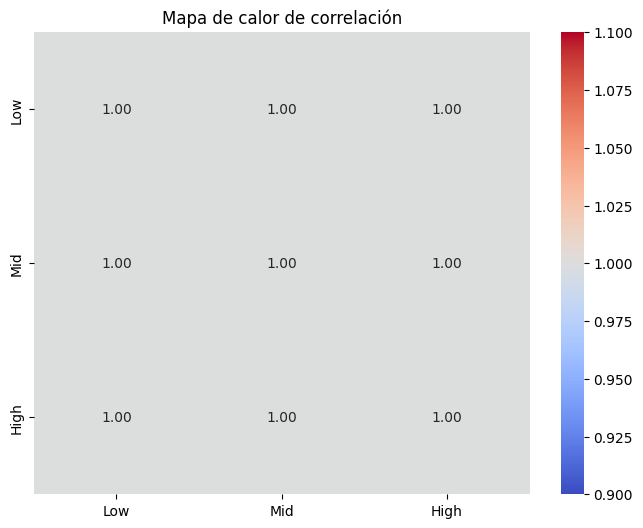

In [17]:
# Mapa de calor de la correlación entre variables numéricas:
plt.figure(figsize=(8, 6))
corr_matrix = anglePerfilesComerciales_df[['Low', 'Mid', 'High']].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de calor de correlación")
plt.show()

Todas las variables tienen una correlación perfecta positiva.

Cada fecha es única, así que si se quieren ver distribuciones de la variable que no sean uniformes para obtener gráficos de barras y de pastel más interesantes, se puede realizar transformaciones a la variable 'Date'.

#### Exportación de los datos

In [18]:
def transformar_fecha_desde_date(df):
    """
    Convierte en sitio la columna 'Date' (formato 'Mes Año' en inglés) en una
    columna Period 'Fecha' (tipo period[M]), la pone primero y elimina la
    original.
    """
    # 1) Crear la columna 'Fecha':
    df['Fecha'] = pd.to_datetime(df['Date'], format='%B %Y').dt.to_period('M')

    # 2) Borrar la columna original 'Date':
    df.drop(columns=['Date'], inplace=True)

    # 3) Mover 'Fecha' al inicio:
    fecha = df.pop('Fecha') # Extraer la serie y eliminarla.
    df.insert(0, 'Fecha', fecha) # Insertarla al inicio.

In [19]:
# Dar formato a la fecha:
transformar_fecha_desde_date(anglePerfilesComerciales_df)

In [20]:
anglePerfilesComerciales_df.head() # Mostrar primeras filas.

,Fecha,Low,Mid,High
0,1993-11,15.800000,15.800000,15.800000
1,1993-12,16.050000,16.050000,16.050000
2,1994-01,16.300000,16.300000,16.300000
3,1994-02,16.383333,16.383333,16.383333
4,1994-03,16.466667,16.466667,16.466667


In [21]:
# Seleccionaf Fecha y Mid, y renombrar Mid a DataFrame:
anglePerfilesComerciales_df = anglePerfilesComerciales_df[['Fecha', 'Mid']].rename(columns={'Mid': 'anglePerfilesComerciales'})

In [22]:
anglePerfilesComerciales_df.head() # Mostrar primeras filas.

,Fecha,anglePerfilesComerciales
0,1993-11,15.800000
1,1993-12,16.050000
2,1994-01,16.300000
3,1994-02,16.383333
4,1994-03,16.466667


In [23]:
# Exportar a CSV:
anglePerfilesComerciales_df.to_csv('anglePerfilesComerciales.csv', index=False)